<a href="https://colab.research.google.com/github/OlegTkhor/sudoku/blob/main/Sudoku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

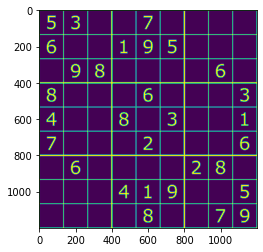

In [2]:
#read your file
file ='/content/sample_data/sudoku.png'
#file ='/content/sample_data/Sdk_ex00s.jpg'
image = cv2.imread(file)

gray_scale=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
th1,img_bin = cv2.threshold(gray_scale,150,225,cv2.THRESH_BINARY)
img_bin=~img_bin
plt.imshow(img_bin)

In [3]:
def detect_box(image,line_min_width=15):
  gray_scale=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  th1,img_bin=cv2.threshold(gray_scale,150,225,cv2.THRESH_BINARY)
  kernal_h=np.ones((1,line_min_width), np.uint8)
  kernal_v=np.ones((line_min_width,1), np.uint8)
  img_bin_h=cv2.morphologyEx(~img_bin, cv2.MORPH_OPEN, kernal_h)
  img_bin_v=cv2.morphologyEx(~img_bin, cv2.MORPH_OPEN, kernal_v)
  img_bin_final=img_bin_h|img_bin_v
  final_kernel=np.ones((3,3), np.uint8)
  img_bin_final=cv2.dilate(img_bin_final,final_kernel,iterations=1)
  ret, labels, stats,centroids = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)
  return stats,labels
  

In [4]:
stats,labels = detect_box(image=image ,line_min_width=15)
height, width, _ = image.shape
height = .9*height/9
boxes = []
for x,y,w,h,area in stats[2:]:
  if h>= height:
    boxes.append([x,y,w,h])

boxes.append([0,0,boxes[0][2],boxes[0][3]])
print(len(boxes))

81


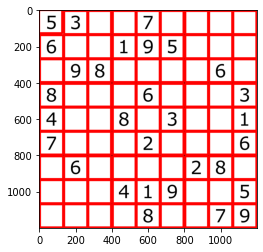

In [5]:
for x,y,w,h in boxes:
  cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),10)
plt.imshow(image)

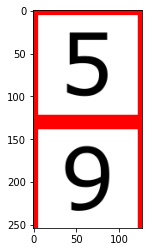

In [19]:
boxes.sort()
x,y,h,w = boxes[79]
roi = image[y:y+2*h, x: x+w]
plt.imshow(roi)